In [1]:
import ROOT as r
import numpy as np
import matplotlib.pyplot as plt
import math

Welcome to JupyROOT 6.14/00


In [2]:
#Function which compute the percentage resolution as FWHM/mean*100
def Resolution(function):
    
    #Annullo il fondo
    function.SetParameter(3,0)
    function.SetParameter(4,0)
    mean = function.GetParameter(1)

    maxi = function.GetMaximum()
    Xmax = function.GetMaximumX()
    temp = Xmax
    estremo_sx = 0
    estremo_dx = 0
    epsilon = 0.0001

    #Determino l'estremo sinistro
    while(1):
        if function.Eval(temp) < maxi/2:
            estremo_sx = temp
            break

        temp -= epsilon

    temp = Xmax

    #Determino l'estremo destro
    while(1):
        if function.Eval(temp) < maxi/2:
            estremo_dx = temp
            break
        temp += epsilon

    return (estremo_dx - estremo_sx)*100/mean

[   0    1    2 ...  999 1000 1001]


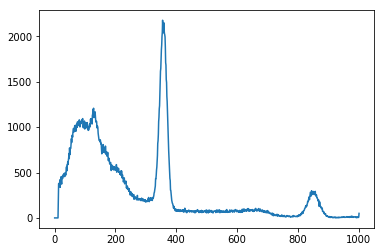

In [3]:
f = open("/home/giacomo/lab/prova.txt", "r")
lists = f.readlines()
value = []
for i in lists:
    value.append(i.strip())
value = list(map(int,value))
#print(value)
n = np.arange(0,1002,1)
print(n)
plt.plot(n,value)

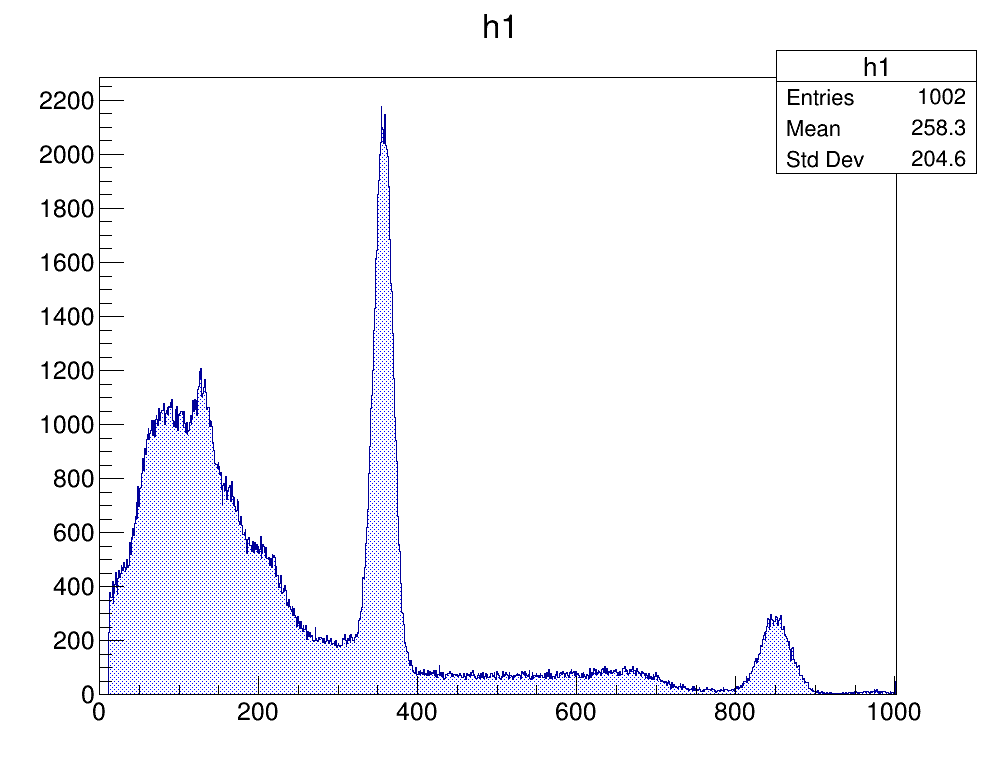

In [4]:
h1 = r.TH1F("h1", "h1", 1002, 0, 1002)
h1.SetFillColor(r.kBlue)
h1.SetFillStyle(3003)
i = 0
while i < len(value):
    h1.SetBinContent(i,value[i])
    i += 1 
c1 = r.TCanvas("c1", "c1",50,50,1000,800)
h1.Draw("histo")
c1.Draw()    

integral 68400
 FCN=256.675 FROM MIGRAD    STATUS=CONVERGED     493 CALLS         494 TOTAL
                     EDM=5.56386e-07    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   1.9 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           1.99480e+03   1.09617e+01  -1.59651e-01   1.84391e-05
   2  p1           3.56542e+02   5.70133e-02   8.53186e-05   1.82513e-03
   3  p2           1.65591e+01   6.85388e-02  -1.16140e-03   1.93752e-03
   4  p3          -9.38345e-01   1.39739e-02  -1.00803e-04   3.20749e-01
   5  p4           4.74214e+02   5.37355e+00   3.54887e-02   9.55168e-04
                               ERR DEF= 0.5


Warning in <TROOT::Append>: Replacing existing TH1: h2 (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2


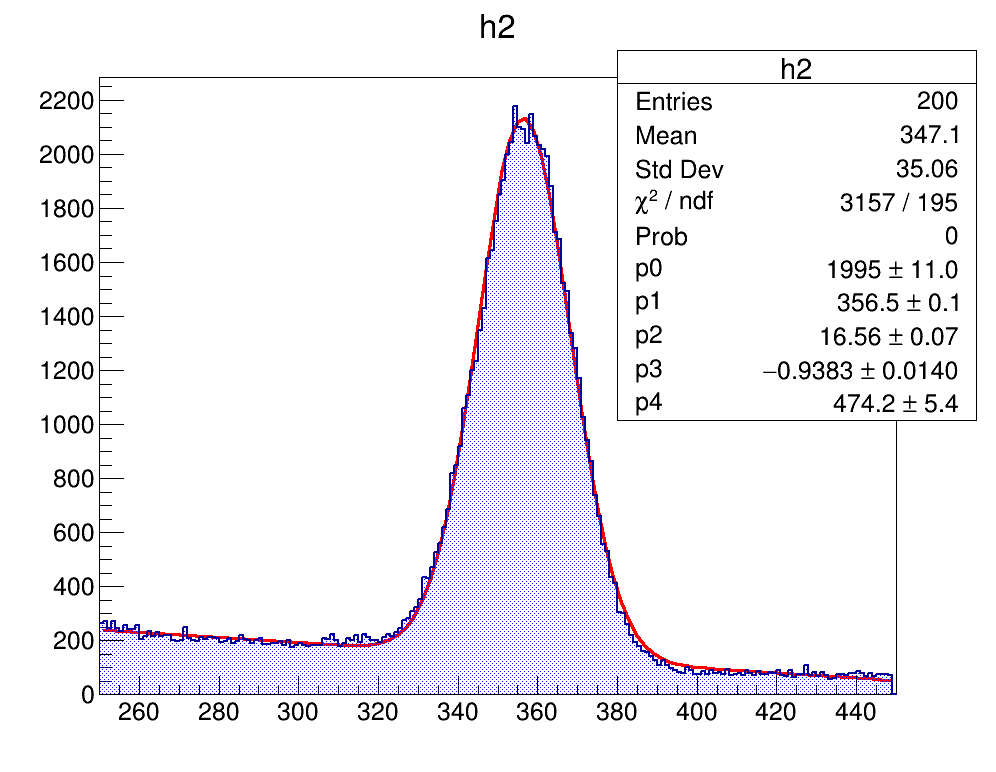

In [16]:
h2 = r.TH1F("h2", "h2",200, 250, 450)
h2.SetFillColor(r.kBlue)
h2.SetFillStyle(3003)
h2.SetLineWidth(2)
i = 250
z = 0
fit = r.TF1("fit", "[0]*exp(-((x[0]-[1])^2)/[2]^2)+[3]*x[0]+[4]",250,450)
fit.SetParameters(2200,354,18,0,1)
fit.SetLineWidth(3)
while i < 450:
    h2.SetBinContent(z,value[i])
    i += 1 
    z += 1
integral = 0
for i in value[320:390]:
    integral += i
print("integral {}".format(integral))
c2 = r.TCanvas("c2", "c2",50,50,1000,800)
h2.Fit("fit", "RL")
h2.Draw("histo same")
r.gStyle.SetOptStat(1111)
r.gStyle.SetOptFit(1111)
c2.Draw()   


In [29]:
Res = Resolution(fit)
print(Res)

7.73340085690643


integral 72556
integral 72556
 FCN=256.675 FROM MIGRAD    STATUS=CONVERGED     493 CALLS         494 TOTAL
                     EDM=5.56386e-07    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   1.9 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           1.99480e+03   1.09617e+01  -1.59651e-01   1.84391e-05
   2  p1           3.56542e+02   5.70133e-02   8.53186e-05   1.82513e-03
   3  p2           1.65591e+01   6.85388e-02  -1.16140e-03   1.93752e-03
   4  p3          -9.38345e-01   1.39739e-02  -1.00803e-04   3.20749e-01
   5  p4           4.74214e+02   5.37355e+00   3.54887e-02   9.55168e-04
                               ERR DEF= 0.5
 FCN=256.675 FROM MIGRAD    STATUS=CONVERGED     493 CALLS         494 TOTAL
                     EDM=5.56386e-07    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   1.9 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.

Warning in <TROOT::Append>: Replacing existing TH1: h2 (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2
Warning in <TROOT::Append>: Replacing existing TH1: h2 (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2


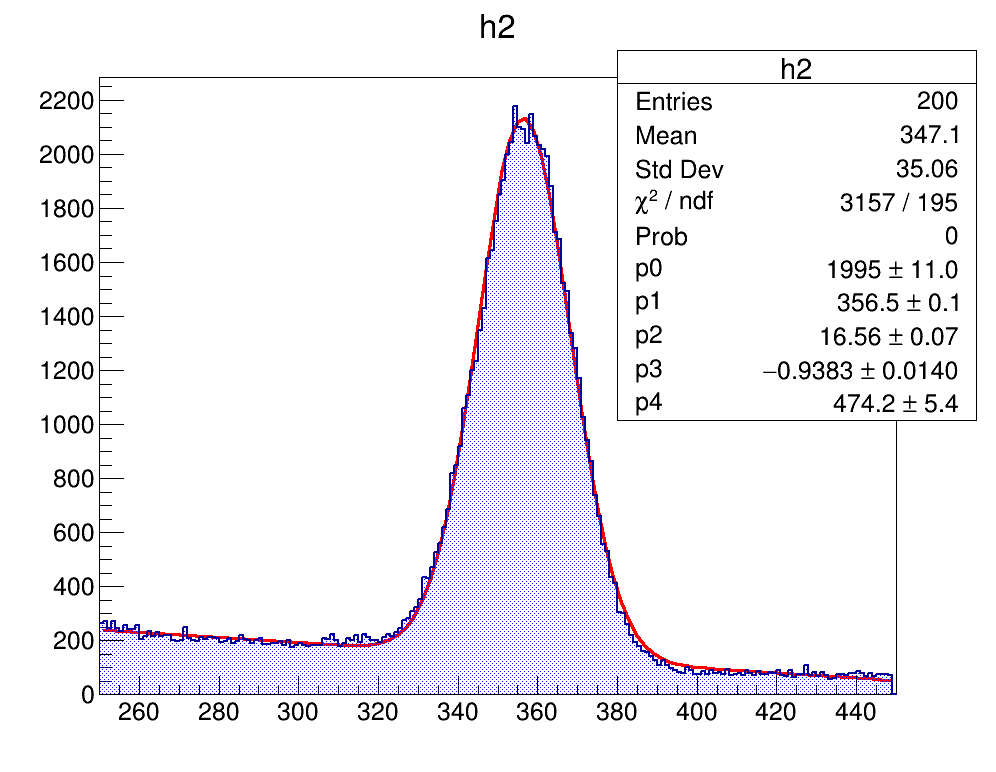

In [53]:
j = 0
Resolutions = []
Integrals = []
while j < 2:
    f = open("/home/giacomo/lab/{}.txt".format(j), "r")
    lists = f.readlines()
    value = []
    for i in lists:
        value.append(i.strip())
    value = list(map(int,value))
    h2 = r.TH1F("h2", "h2",200, 250, 450)
    h2.SetFillColor(r.kBlue)
    h2.SetFillStyle(3003)
    h2.SetLineWidth(2)
    i = 250
    z = 0
    fit = r.TF1("fit", "[0]*exp(-((x[0]-[1])^2)/[2]^2)+[3]*x[0]+[4]",250,450)
    fit.SetParameters(2200,354,18,0,1)
    fit.SetLineWidth(3)
    while i < 450:
        h2.SetBinContent(z,value[i])
        i += 1 
        z += 1
    c2 = r.TCanvas("c2", "c2",50,50,1000,800)
    h2.Fit("fit", "RL")
    h2.Draw("histo same")
    r.gStyle.SetOptStat(1111)
    r.gStyle.SetOptFit(1111)
    c2.Draw() 
    integral = 0
    mean = fit.GetParameter(1)
    sigma = fit.GetParameter(2)
    for i in value[int(np.rint(mean-3*sigma)):int(np.rint(mean+3*sigma))]:
        integral += i
    print("integral {}".format(integral))
    Res = Resolution(fit)
    Resolutions.append(Res)
    Integrals.append(integral/200)
    j+=1

In [54]:
print(Resolutions)
print(Integrals)

[7.73340085690643, 7.73340085690643]
[362.78, 362.78]
